## This notebook contains codes for feature engineering and machine learning algorithms performed on the titanic dataset available on Kaggle.com

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# importing data
data = pd.read_csv("train.csv")
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.Sex.replace({'male': 0, 'female': 1}, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
total = df.isnull().sum().sort_values(ascending = False)
percent_1 =df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending = False)
missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [7]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
round(df.Embarked.value_counts()/len(df.Embarked)*100, 2)

Embarked
S    72.28
C    18.86
Q     8.64
Name: count, dtype: float64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

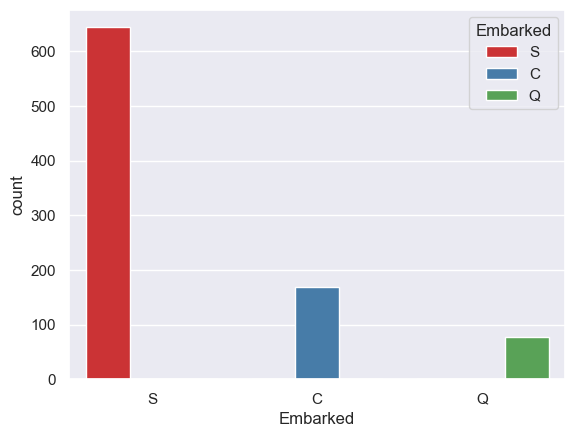

In [9]:
sns.set(style = "darkgrid")
sns.countplot(x = 'Embarked', data = df, hue = "Embarked", palette = 'Set1')

<AxesSubplot:xlabel='Survived', ylabel='count'>

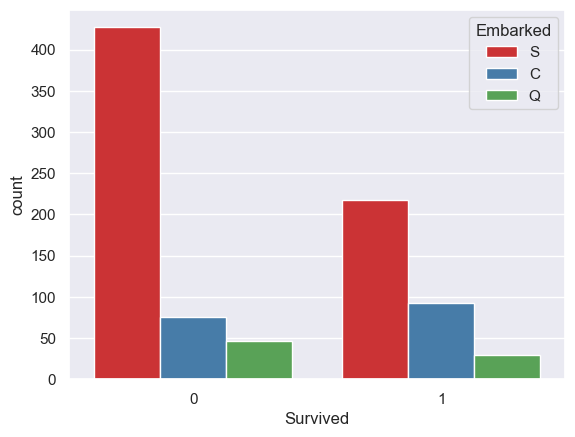

In [10]:
sns.set(style = "darkgrid")
sns.countplot(x = 'Survived', data = df, hue = 'Embarked', palette = 'Set1')

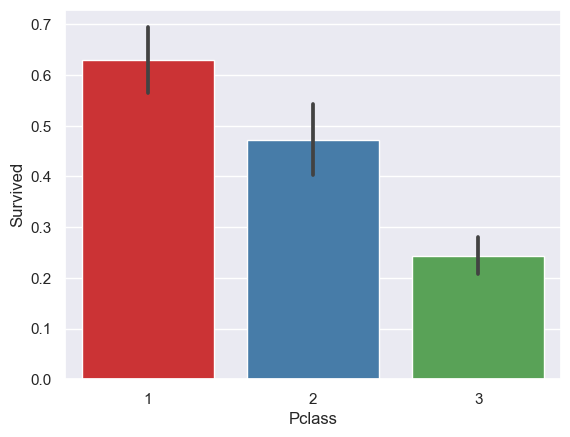

In [11]:
sns.barplot(x='Pclass', y='Survived', data=df, palette = 'Set1');

In [12]:
df["relatives"] = (df.SibSp + df.Parch)
df.loc[df.relatives > 0, 'travelled_alone'] = 'no'
df.loc[df.relatives == 0, 'travelled_alone'] = 'yes'


In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,no
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,no
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,yes


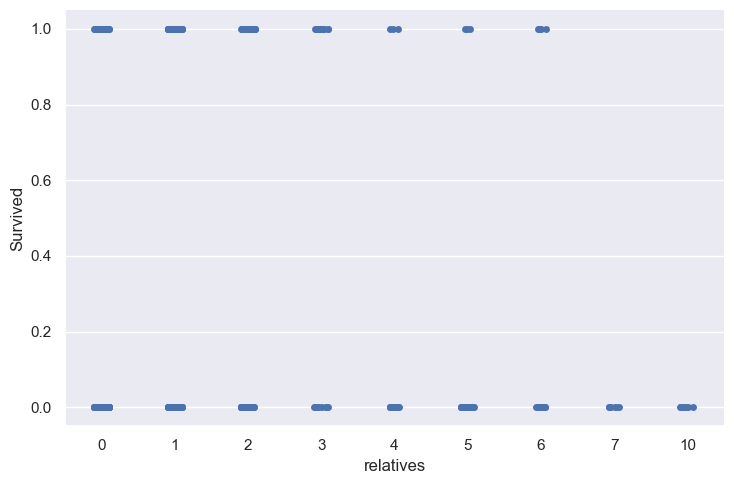

In [16]:
sns.catplot(x = 'relatives', y = 'Survived', data = df, aspect = 1.5);

## Data Preprocessing / Feature Engineering

In [17]:
df.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [18]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [19]:
# Alphabet in the cabin might be the deck number

import re
deck = {"A": "A", "B":"B", "C":"C", "D":"D", "E": "E", "F":"F", "G":"G", "U":"U"}
df.Cabin = df.Cabin.fillna("U0")
df.Deck = df.Cabin.map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
df['Deck'] = df.Deck.map(deck)

C:\Users\User\AppData\Local\Temp\ipykernel_15840\1329162102.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Deck = df.Cabin.map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())


In [20]:
df.Deck

0      U
1      C
2      U
3      C
4      U
      ..
886    U
887    B
888    U
889    C
890    U
Name: Cabin, Length: 891, dtype: object

In [21]:
# For Age

mean = df.Age.mean()
std = df.Age.std()
total_null = df.Age.isnull().sum()

#compute random numbers between the mean,std and total_null
rand_age = np.random.randint(mean - std, mean + std, size = total_null)

# Fill NaN values with the random values generated.
df.Age[np.isnan(df.Age)] = rand_age



C:\Users\User\AppData\Local\Temp\ipykernel_15840\665173074.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[np.isnan(df.Age)] = rand_age


In [22]:
df["Embarked"] = df.Embarked.fillna('S')

In [23]:
df.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
relatives          0
travelled_alone    0
Deck               1
dtype: int64

In [24]:
df.Fare = df.Fare.astype(int)

In [25]:
df.Name.str.extract('([A-Za-z]+)\.', expand = False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [26]:
titles = {"Mr": 1, "Miss" : 2, "Mrs": 3, "Master": 4, "Rare": 5}

# extracting titles from name
df['title'] = df.Name.str.extract('([A-Za-z]+)\.', expand = False)

# replace titles with a more common title or as Rare
df.title = df.title.replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df.title = df.title.replace('Mlle', 'Miss')
df.title = df.title.replace('Ms', 'Miss')
df.title = df.title.replace('Mme', 'Mrs')

# Converting titles to numbers
df.title = df.title.map(titles)


In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone,Deck,title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,U0,S,1,no,U,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,C85,C,1,no,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,U0,S,0,yes,U,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,C123,S,1,no,C,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,U0,S,0,yes,U,1


In [42]:
new_embarked = pd.get_dummies(df.Embarked)
df = df.join(new_embarked)

AttributeError: 'DataFrame' object has no attribute 'Embarked'

In [43]:
new_travelled = pd.get_dummies(df.travelled_alone)
df = df.join(new_travelled)

AttributeError: 'DataFrame' object has no attribute 'travelled_alone'

In [44]:
new_deck = pd.get_dummies(df.Deck)
df = df.join(new_deck, how = 'left', lsuffix='left', rsuffix='right')

AttributeError: 'DataFrame' object has no attribute 'Deck'

## Dropping unwanted columns

In [45]:
df.drop(columns = ['Deck', 'travelled_alone', 'Embarked', 'Cabin', 'Ticket', 'Name', 'PassengerId'], axis = 1, inplace = True)

KeyError: "['Deck', 'travelled_alone', 'Embarked', 'Cabin', 'Ticket', 'Name', 'PassengerId'] not found in axis"

In [46]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,title,Cleft,...,no,yes,A,B,Cright,D,E,F,G,U
0,0,3,0,22.0,1,0,7,1,1,False,...,True,False,False,False,False,False,False,False,False,True
1,1,1,1,38.0,1,0,71,1,3,True,...,True,False,False,False,True,False,False,False,False,False
2,1,3,1,26.0,0,0,7,0,2,False,...,False,True,False,False,False,False,False,False,False,True
3,1,1,1,35.0,1,0,53,1,3,False,...,True,False,False,False,True,False,False,False,False,False
4,0,3,0,35.0,0,0,8,0,1,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13,0,5,False,...,False,True,False,False,False,False,False,False,False,True
887,1,1,1,19.0,0,0,30,0,2,False,...,False,True,False,True,False,False,False,False,False,False
888,0,3,1,34.0,1,2,23,3,2,False,...,True,False,False,False,False,False,False,False,False,True
889,1,1,0,26.0,0,0,30,0,1,True,...,False,True,False,False,True,False,False,False,False,False


<AxesSubplot:>

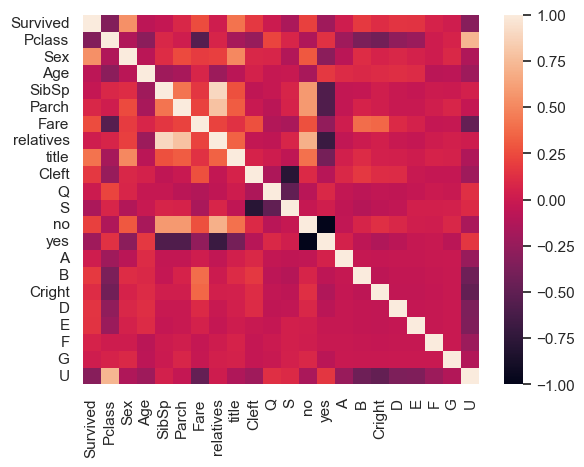

In [47]:
sns.heatmap(df.corr())

C:\Users\User\AppData\Local\Temp\ipykernel_15840\2178311872.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'], ax = axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_15840\2178311872.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], ax = axes[1])
C:\Users\User\AppData

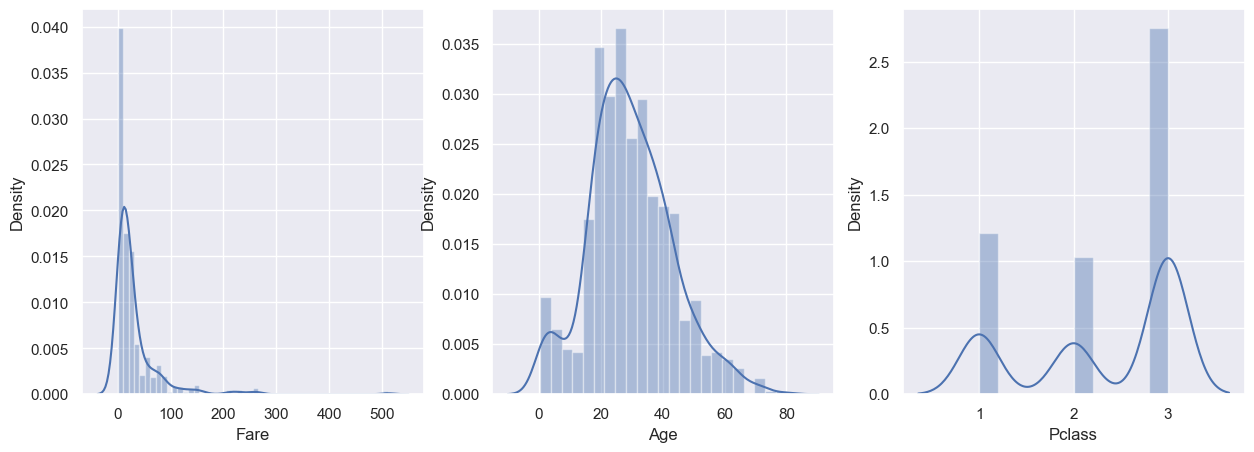

In [48]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
sns.distplot(df['Fare'], ax = axes[0])
sns.distplot(df['Age'], ax = axes[1])
sns.distplot(df['Pclass'], ax = axes[2])
plt.show()

## Handling Outliers

<AxesSubplot:>

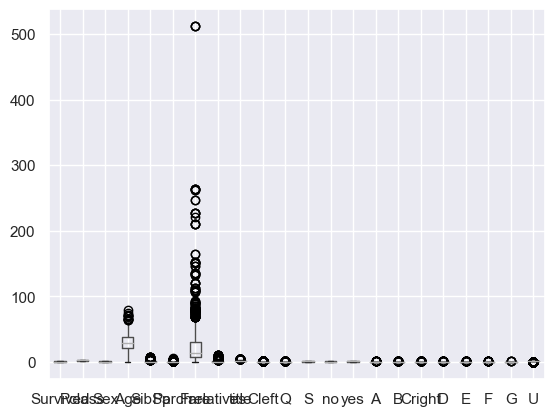

In [49]:
df.boxplot()

In [50]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,title,Cleft,...,no,yes,A,B,Cright,D,E,F,G,U
0,0,3,0,22.0,1,0,7,1,1,False,...,True,False,False,False,False,False,False,False,False,True
1,1,1,1,38.0,1,0,71,1,3,True,...,True,False,False,False,True,False,False,False,False,False
2,1,3,1,26.0,0,0,7,0,2,False,...,False,True,False,False,False,False,False,False,False,True
3,1,1,1,35.0,1,0,53,1,3,False,...,True,False,False,False,True,False,False,False,False,False
4,0,3,0,35.0,0,0,8,0,1,False,...,False,True,False,False,False,False,False,False,False,True


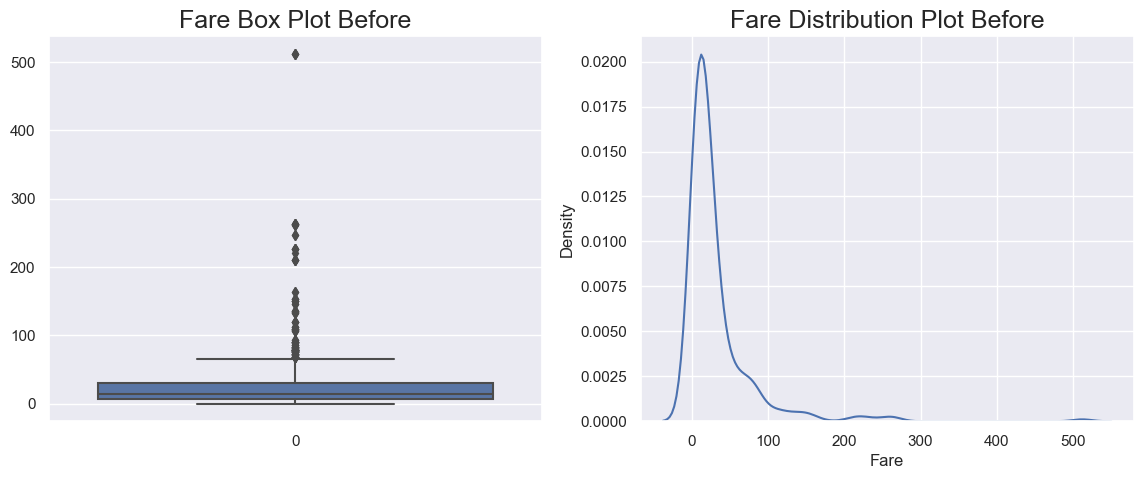

In [51]:
fig, axes = plt.subplots(1, 2, figsize = (14, 5))
sns.boxplot(df.Fare, ax = axes[0]).set_title('Fare Box Plot Before', fontsize = 18)

sns.kdeplot(df.Fare, ax = axes[1]).set_title('Fare Distribution Plot Before', fontsize = 18)
plt.show()